In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['41.json', '40.json', '37.json', '21.json', '26.json', '27.json', '1.json', '2.json', '90.json', '24.json', '25.json', '22.json', '38.json', '4.json', '42.json', '39.json', '23.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/41.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/40.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/37.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/21.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/26.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/27.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/1.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/2.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/90.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/24.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/25.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/22.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/38.json
/Users/aritram

In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[69225, 69212, 69235, 69232, 69216, 69209, 69231, 69217, 69273, 69222, 69223, 69195, 69251, 69185, 69142, 69139, 69189, 69171, 69249, 69215, 69138, 69147, 69177, 69207, 69228, 69183, 69279, 69285, 69211, 69230, 69149, 69151, 69144, 69169, 68360, 69186, 69180, 69143, 69181, 68365, 69178, 68364, 69170, 68359, 68356, 69158, 69187, 68363, 69166, 68366, 69148, 69184, 69173, 69146, 69182, 68358, 68361, 69141, 69145, 68314, 68313, 68316, 68315, 69153, 68352, 68353, 69243, 69241, 69239, 69257, 69253, 69244, 69277, 69229, 69219, 69218, 69250, 69242, 69256, 69298, 69259, 69224, 69210, 69220, 69237, 69226, 69252, 69255, 69214, 69262, 69240, 69233, 69213, 69238, 69267, 69288, 69254, 69292, 69227, 69247, 69221, 265835, 266838, 265963, 266117, 266916, 267183, 267197, 70264, 70273, 267301, 265896, 265866, 267400, 266406, 267085, 267561, 266148, 266045, 70303, 266240, 267597, 266794, 267343, 266631, 266320, 266230, 266525, 266560, 266846, 266531, 266921, 267499, 266741, 266871, 266967, 266929, 266770,

In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/11/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,69225,Barcelona,Real Madrid
1,69212,Barcelona,Atlético Madrid
2,69235,Málaga,Barcelona
3,69232,Barcelona,Almería
4,69216,Barcelona,Athletic Club
...,...,...,...
32,69338,Villarreal,Barcelona
33,70220,Barcelona,Osasuna
34,70224,Rayo Vallecano,Barcelona
35,70221,Levante,Barcelona


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,d0a3a318-9e65-4f79-9a78-1e65d4ea5b82,104,1,2022-11-23 00:01:56.139,1,56,7,Barcelona,20177.0,Eric-Sylvain Bilal Abidal,...,Ball Recovery,High Pass,83.5,29.2,120.0,33.4,69225,Barcelona,Real Madrid,Home
1,572ebe7b-7efb-4370-98d4-3d178ce0c59d,247,1,2022-11-23 00:05:25.322,5,25,15,Barcelona,5503.0,Lionel Andrés Messi Cuccittini,...,Carry,Ground Pass,110.4,54.2,118.2,41.8,69225,Barcelona,Real Madrid,Home
2,9f17a2a7-976c-4eb7-b4be-7cb6f2b9bdc1,311,1,2022-11-23 00:06:29.899,6,29,19,Barcelona,15516.0,Thierry Henry,...,Pressure,Ground Pass,93.2,24.1,120.0,34.5,69225,Barcelona,Real Madrid,Home
3,bb3d8291-0dba-40a9-9ed0-f395eef891f6,662,1,2022-11-23 00:15:56.988,15,56,34,Barcelona,5503.0,Lionel Andrés Messi Cuccittini,...,Pressure,High Pass,108.1,53.1,118.8,41.6,69225,Barcelona,Real Madrid,Home
4,71faa4ab-6734-4fa1-b309-29df1020285c,684,1,2022-11-23 00:16:30.980,16,30,37,Barcelona,3087.0,Gnégnéri Yaya Touré,...,Carry,Ground Pass,100.7,36.6,104.8,36.6,69225,Barcelona,Real Madrid,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12835,6653337b-5599-453f-872d-379cfb5823eb,3664,2,2022-11-23 00:34:48.656,79,48,200,Athletic Club,6388.0,Ander Iturraspe Derteano,...,Ball Recovery,High Pass,95.9,45.2,120.0,31.8,69323,Barcelona,Athletic Club,Away
12836,7afa362d-de22-4a37-ac93-7d2f7579c593,3730,2,2022-11-23 00:36:38.351,81,38,204,Athletic Club,6390.0,Markel Susaeta Laskurain,...,Ball Receipt*,High Pass,109.4,27.8,111.7,30.2,69323,Barcelona,Athletic Club,Away
12837,36ec2b3a-e40c-40bb-8c60-fc92bebf3a93,3885,2,2022-11-23 00:40:02.956,85,2,210,Athletic Club,6390.0,Markel Susaeta Laskurain,...,Pressure,High Pass,100.9,20.7,107.9,27.1,69323,Barcelona,Athletic Club,Away
12838,8645c39f-b071-4b79-ba36-ab433ef4d79b,4036,2,2022-11-23 00:43:42.852,88,42,218,Barcelona,20169.0,Seydou Kéita,...,Ball Recovery,Ground Pass,111.5,26.8,120.0,41.0,69323,Barcelona,Athletic Club,Home


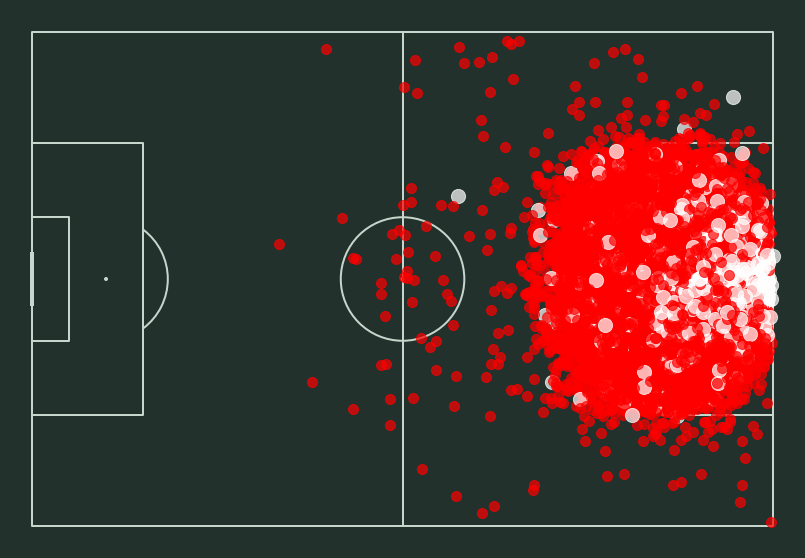

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("Laligafinal.xlsx")